# EEC174AY Project A1: PreLab
You are NOT allowed to import any other libraries in this notebook otherwise points will be deducted. If you need to please confirm with the TA. ''' TODO ''' Indicates where your solution code should go. Please ensure code is readable easily.

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Visualizing Ground Truth Bounding Boxes

The code below is provided to load `imgs/cats.jpg` and display it using [opencv](https://docs.opencv.org/4.x/).

You must add code to display the bounding boxes, which are given as `gt_boxes` in green color. These represent the ground truth bounding box coordinates in `[x, y, w, h]` format.

Please use `cv2.rectange()` to achieve this. Click [here](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html) to see hint.

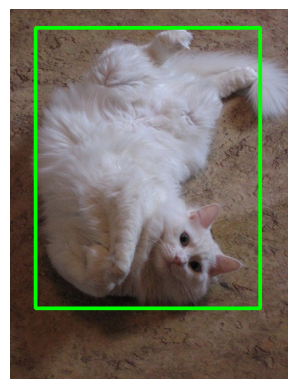

In [62]:
# Load the image
image_path = "imgs/cat.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ground truth bounding box [x, y, w, h]
gt_box = [34, 25, 303, 379]

green_box = (0, 255, 0)

# Use gt_boxes and display the bounding boxes in green color
cv2.rectangle(image_rgb, (gt_box[0], gt_box[1]), (gt_box[0] + gt_box[2], gt_box[1] + gt_box[3]), color = green_box, thickness = 3)

# Display the image with bounding boxes using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

## Part 2: Implementing the IoU Function

Complete the `compute_iou()` function. This function should accept two bounding boxes and return the IoU value between them. Ensure that the function can handle edge cases (e.g., no overlap between the boxes).

(Hint: See Lecture W5L1_Object Detection Slide 11)

In [63]:
def compute_iou(boxA, boxB):
    # box = [left, top, right, bottom]
    leftA, topA, rightA, botA = boxA[0], boxA[1], boxA[2], boxA[3]
    leftB, topB, rightB, botB = boxB[0], boxB[1], boxB[2], boxB[3]

    left_intersect = max(leftA, leftB)
    right_intersect = min(rightA, rightB)
    top_intersect = max(topA, topB)
    bot_intersect = min(botA, botB)

    if ((right_intersect < left_intersect) or (bot_intersect < top_intersect)):
      return 0 # No intersection between box A and box B
    
    area_intersect = (right_intersect - left_intersect) * (bot_intersect - top_intersect) # Area at which they overlap
    area_boxA = (rightA - leftA) * (botA - topA)
    area_boxB = (rightB - leftB) * (botB - topB)

    area_union = area_boxA + area_boxB - area_intersect 
    iou = area_intersect / area_union

    return iou

# Part 3: Visualizing Predicted Bounding Boxes and Computing IoUs

Four sets of predicted bounding boxes have been provided in `predictions`. The ground truth bounding boxes are in `gt_boxes`

For each set of predicted bounding boxes:
1. Draw the predicted boxes on a copy of the original image in red.
2. Draw the ground truth boxes on the same image in green.
3. Compute the IoU for predictions and ground truth.
4. Display the image with both the predicted and ground truth boxes. Use the title of the plot to display the maximum IoU value for each prediction.

You should have 4 images, each with a GT and prediction (1,2,3 or 4) bounbding box plotted (GT in green,. pred in red), and the IoU be the title of the images.

0.8788776174574171


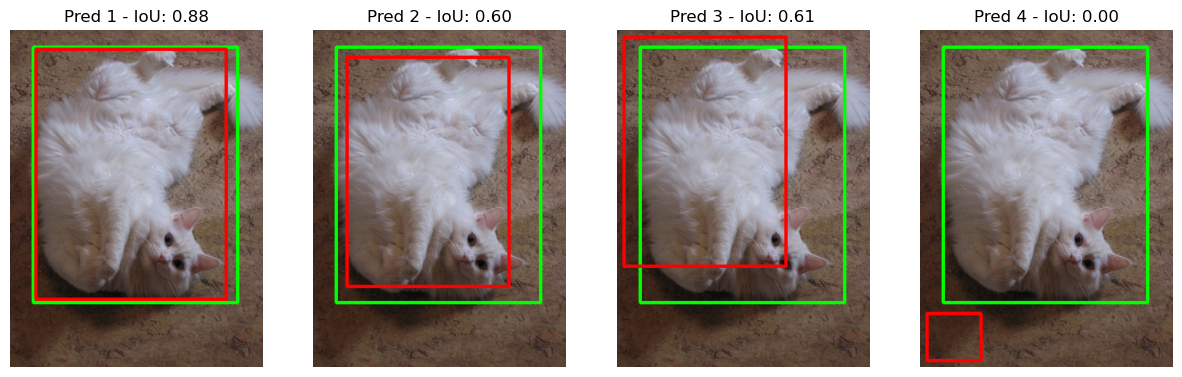

In [64]:
# Predicted bounding boxes [x, y, w, h]
predictions = [
    [38, 28, 282, 371],  # Pred 1
    [50, 40, 240, 340],  # Pred 2
    [10, 10, 240, 340],  # Pred 3
    [10, 420, 80, 70]    # Pred 4
]

# For each predicted box, visualize it on the image individually (with GT)
#   and compute its IoU with the ground truth.

# Display images horizontally
fig, axes = plt.subplots(1, len(predictions), figsize = (15, 5))

green_box = (0, 255, 0)
red_box = (255, 0 , 0)

gt_boxes = [34, 25, 303, 379]

for i in range(len(predictions)):
    
    img_cpy = image_rgb.copy()
    
    pred_box = predictions[i]
    
    # Draw predicted boxes on copy of original image in red
    cv2.rectangle(img_cpy, (pred_box[0], pred_box[1]), (pred_box[0] + pred_box[2], pred_box[1] + pred_box[3]), 
                    color = red_box, thickness = 3)
    
    # Draw ground truth boxes on copy of original image in green
    cv2.rectangle(image_rgb, (gt_box[0], gt_box[1]), (gt_box[0] + gt_box[2], gt_box[1] + gt_box[3]), 
                  color = green_box, thickness = 3)
    
    # Compute IoU 
    IoU = compute_iou(gt_box, pred_box)
    
    axes[i].imshow(img_cpy)
    axes[i].set_title("Pred %d - IoU: %.2f" % (i + 1, IoU))
    axes[i].axis('off') 

plt.show()